In [199]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy import optimize as opt
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from statsmodels.api import add_constant
from statsmodels.api import OLS

## 1.

Assume you have the following dataset

    25 37 24 28 2 35 22 31 53 41 64 29 120 72 2

    a. Write a code in python to find

        i. Mean

        ii. Median

        iii. Mode

        iv. Standard deviation

        v. Interquartile range

    b. Can you find out which of the points are outliers in the above dataset?

    c. Use any library in python to create boxplot of the above dataset

In [ ]:
X = np.array([25, 37, 24, 28, 2, 35, 22, 31, 53, 41, 64, 29, 120, 72, 2])

In [166]:
class Descriptor():
    def __init__(self, data):
    
        self.data = data
    
    def mean(self, axis = 0):
        return self.data.mean(axis = axis)
    
    def median(self, axis = 0):
        return np.median(self.data, axis = axis)

    def mode(self, axis = 0):
        mode_, count_ = stats.mode(self.data, axis = axis)
        return mode_, count_
    
    def sdev(self, axis = 0, ddof = 0):        
        return self.data.std(axis = axis, ddof = ddof)

    def iqr(self, axis = 0, range = [25, 75]):
        return stats.iqr(self.data, axis = axis, rng = range)
    
    def outliers(self, axis = 0, range = [25, 75], scale = 1.5):

        iqr = self.iqr(axis = axis, range = range)
        lower_threshold = np.quantile(self.data, q = range[0]/100., axis = axis) - scale * iqr
        upper_threshold = np.quantile(self.data, q = range[1]/100., axis = axis) + scale * iqr

        outliers = (self.data < lower_threshold) | (self.data > upper_threshold)

        outlier_values = self.data[outliers]
        outlier_idx = np.where(outliers)

        return outlier_values, outlier_idx
    

In [ ]:
descriptor = Descriptor(X)

# 1.a.i Mean
X_mean =  descriptor.mean()
print(f"Mean of X = {X_mean:.2f}")

# 1.a.ii Median
X_median =  descriptor.median()
print(f"Median of X = {X_median:.2f}")

# 1.a.iii Mode
X_mode =  descriptor.mode()[0]
print(f"Mode of X = {X_mode:.2f}")

# 1.a.iv Standard deviation
X_sdev =  descriptor.sdev()
print(f"Standard deviation of X = {X_sdev:.2f}")

# 1.a.v Interquartile Range
X_iqr =  descriptor.iqr()
print(f"Interquartile Range of X = {X_iqr:.2f}")

# 1.b Outliers
X_outliers = descriptor.outliers()[0]
print(f"Outliers of X = {X_outliers}")

# 1.c Boxplot
fig = plt.figure(figsize = (2.5, 5))
sns.boxplot(X) ; 
plt.grid(True)
plt.xlabel("X")
plt.ylabel("Units of X") ;

## 2. 

John is visiting planet Utopia and he figures out that the population is 1 million.
Utopians are very tall and their height varies between 180 cm and 250 cm. John
tries to estimate the population size by randomly identifying 10000 people n times
and finds their mean heights. Can you help John do the following using python:

    a. Generate population samples of size 10000 with height between 180 cm and
    250 cm by varying n(number of times you identify 10000 random people) as
    following:

        i. 5

        ii. 10

        iii. 100

        iv. 1000

        v. 10000

    b. Plot histogram of the sample means

    c. Does the population mean approach normal distribution as the sample size
    increases?

Yes, The sample mean approaches the normal distribution as the smaple increases.


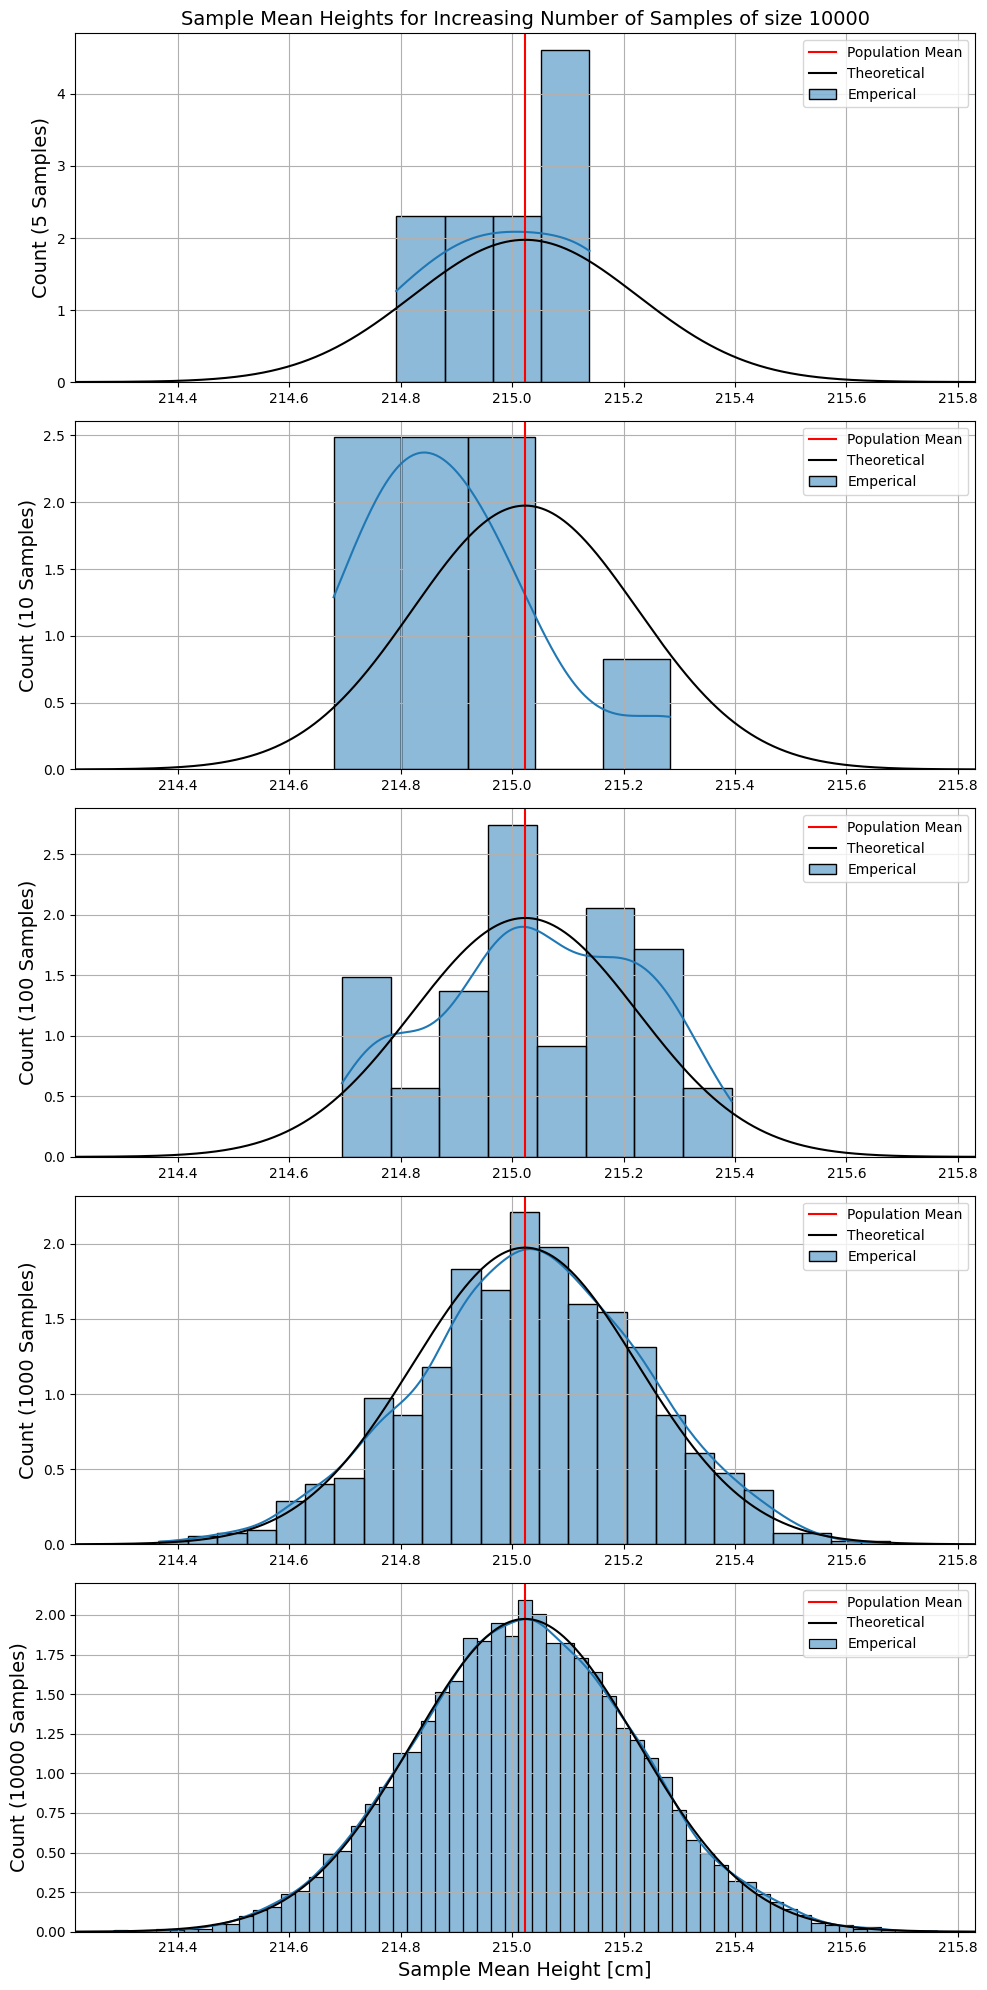

In [298]:
## Population

# Population size
population_size = 1000000

# Min and max height of population
height_min = 180
height_max = 250

# Generate population
uniform = stats.uniform(loc = height_min, scale = (height_max - height_min))
population = uniform.rvs(size = (population_size,))
population_mean = population.mean()
population_sdev = population.std()

# 2.a Generate samples
sample_size = 10000
n_trials = [5, 10, 100, 1000, 10000]

sem = population_sdev / np.sqrt(sample_size)

# Theoretical distribution
X = np.linspace(population_mean - 4*sem, population_mean + 4*sem, sample_size)
theoretical_distribution = stats.norm(loc = population_mean, scale = sem).pdf(X)

fig, axs = plt.subplots(len(n_trials), 1, figsize = (10, 20))

for i,n in enumerate(n_trials):

    samples_n = np.stack([population[np.random.randint(0, population_size, sample_size)] for _ in range(n)], 1)

    # 2.b plot histogram of sampe means    
    sample_means = samples_n.mean(0)    
    sns.histplot(sample_means, ax = axs[i], kde = True, stat = 'density', label = 'Emperical')
    axs[i].grid(True)
    axs[i].set_ylabel(f"Count ({n} Samples)", fontsize = 14)
    if i == 0: axs[i].set_title(f"Sample Mean Heights for Increasing Number of Samples of size {sample_size}", fontsize = 14)
    if i == (len(n_trials)-1): axs[i].set_xlabel("Sample Mean Height [cm]", fontsize = 14)
    axs[i].axvline(x = population_mean, color = 'red', label = 'Population Mean')
    axs[i].set_xlim(population_mean + np.array([-4, 4]) * sem) ;

    axs[i].plot(X, theoretical_distribution, 'black', label = 'Theoretical')
    axs[i].legend()
plt.tight_layout()

# 2.c Does the population mean approach normal distribution as the sample size increases?
print(f"Yes, The sample mean approaches the normal distribution as the smaple increases.")    

## 3. 

Observe the iris dataset below and write a python code to compute following

    a. Covariance between sepal_length and sepal_width

    b. Pearson Correlation between sepal_length and sepal_width
    
    c. Spearman Correlation between sepal_length and sepal_width

In [ ]:
iris = load_iris()

df = pd.DataFrame(iris['data'], columns = [name.replace(" (cm)","").replace(" ", "_") for name in iris['feature_names']])
df['species'] = iris['target_names'][iris['target']]

In [ ]:
# 1) dataframe.plot(kind = 'hist',
#                   y = 'variable')

# import matplotlib.pyplot as plt
# 2) plt.hist(variable)

# import seaborn as sns
# sns.histplot()

In [ ]:
def cov(X, Y, ddof = 0):
    
    if len(X) != len(Y):
        raise ValueError(f"len of X ({len(X)}) does not match len of Y ({len(Y)}).")

    N = len(X)

    X_mean = sum(X)/N
    Y_mean = sum(Y)/N

    result = []
    for x,y in zip(X,Y):
        result.append((x - X_mean)*(y - Y_mean))
    
    cov_ = sum(result) / (N - ddof)

    return cov_

def pcc(X, Y, ddof = 0): 

    XY_cov = cov(X, Y, ddof) 
    X_var = cov(X, X, ddof)
    Y_var = cov(Y, Y, ddof)

    pcc_ = XY_cov / (np.sqrt(X_var)*np.sqrt(Y_var))

    return pcc_

def src(X, Y): 

    if len(X) != len(Y):
        raise ValueError(f"len of X ({len(X)}) does not match len of Y ({len(Y)}).")

    N = len(X)    
    
    X_ranks = stats.rankdata(X)
    Y_ranks = stats.rankdata(Y)

    src_ = 1 - 6*sum((X_ranks - Y_ranks)**2)/(N*(N**2 - 1))

    return src_    



In [ ]:
X = df['sepal_length']
Y = df['sepal_width']

# 3.a. Covariance between sepal_length and sepal_width
cov_XY = cov(X, Y)
cov_XY_stats = np.cov(X, Y)[0, 1]

print(f"Manual Cov = {cov_XY:.4f}")
print(f"Numpy Cov = {cov_XY_stats:.4f}")

# 3.b. Pearson Correlation between sepal_length and sepal_width
pcc_XY = ppc(X, Y)
pcc_XY_stats = np.corrcoef(X, Y)[0, 1]

print(f"Manual PCC = {pcc_XY:.4f}")
print(f"Numpy PCC = {pcc_XY_stats:.4f}")

# 3.c. Spearman Correlation between sepal_length and sepal_width
src_XY = src(X, Y)
src_XY_stats = stats.spearmanr(X, Y)[0]

print(f"Manual SRC = {src_XY:.4f}")
print(f"Numpy SRC = {src_XY_stats:.4f}")

## 4. 

Generate exponential distribution in Python using scipy library using rate=25 and sample size=100.

    a. Plot a histogram of the the above distribution

    b. Calculate probability that x is less than 50 when the mean rate is 25

Estimated Prob = 0.8800
Theoretical Prob = 0.8647


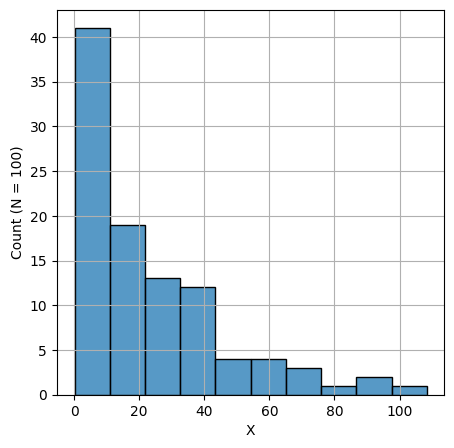

In [303]:
rate = 25 # 1/lambda
sample_size = 100

np.random.seed(42)

expon_ = stats.expon(scale = rate)
X = expon_.rvs(size = (sample_size,))

# 4.a Plot a histogram of the distribution
fig = plt.figure(figsize = (5, 5))
sns.histplot(X)
plt.grid(True)
plt.ylabel(f"Count (N = {sample_size})")
plt.xlabel("X") ;

# 4.b Probability that x is less than 50
p = sum(X < 50)/sample_size
p_true = expon_.cdf(50)

print(f"Estimated Prob = {p:.4f}")
print(f"Theoretical Prob = {p_true:.4f}")


## 5.

 Steve has just learnt about linear regression and MLE and is trying to find out the
relationship between them. He uses the following dataset to learn the relation
between humidity and temperature.

    a. Prepare a sample of the dataset and calculate correlation between humidity and temperature.

    b. Use minimise function from scipy to get the optimal parameters.

        i. You can use np.array([2, 2, 2]) to initialise the parameters.
        
    c. Try out following methods to estimate the parameters(optional):

        i. Use statsmodels to fit a linear regression model using OLS.

        ii. Compare the parameters obtained in b & c. What did you observe?

In [309]:
dataset = pd.read_csv('/Users/brandonhenley/Google Drive/My Drive/IK/data/weatherHistory.csv')

for col in dataset.select_dtypes(include = ['number']).columns:
    data = dataset[col]
    d = Descriptor(data)
    
    _, outlier_idx = d.outliers()
    
    # Replace outliers by taking the mean of the neighbors
    for idx in outlier_idx[0]:
        loc = data.index.get_loc(idx)
        if loc > 0 and loc < (len(data) - 1):
            data.at[loc] = (data.iloc[loc - 1] + data.iloc[loc + 1]) / 2
        elif loc == 0:
            data.at[loc] = data.at[loc+1]
        elif loc == (len(data) - 1):
            data.at[loc] = data.at[loc-1]

dataset = dataset.sample(1000)            
    

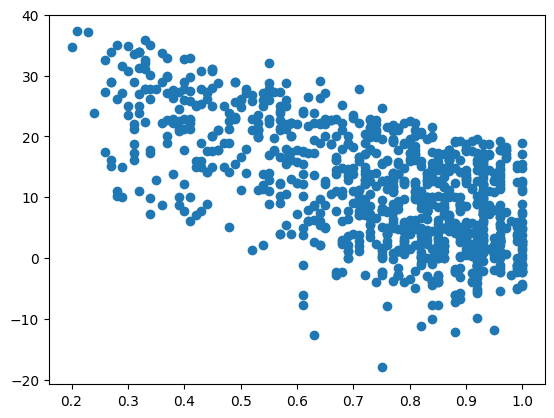

In [310]:
plt.scatter(dataset['Humidity'],
            dataset['Temperature (C)'])

In [311]:
# 5.a. Correlation between humidity and temperature

feature_names = ['Humidity']
target_names = ['Temperature (C)']

X = dataset.loc[:, feature_names].values
Y = dataset.loc[:, target_names].values

ρ_hum_temp = np.corrcoef(X.squeeze(), Y.squeeze())[0, 1]

print(f"PPC between Humidity and Temperature = {ρ_hum_temp:.4f}")

PPC between Humidity and Temperature = -0.6185


In [312]:

seed = 42
np.random.seed(seed)

feature_names = ['Humidity']
target_names = ['Temperature (C)']

num_features, num_targets = len(feature_names), len(target_names)

X = dataset.loc[:, feature_names].values.reshape(-1, num_features)
Y = dataset.loc[:, target_names].values.reshape(-1, num_targets)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, random_state = seed)

# scaler = StandardScaler()
# X_train_s = scaler.fit_transform(X_train)
# X_test_s = scaler.transform(X_test)

N_train, X_size = X_train.shape
N_test, _ = X_test.shape
_, Y_size = Y.shape

# 5.b. Use minimise function from scipy to get the optimal parameters.
def mle_norm(params, X, Y_true, fnc):
    
    coef = params[:-Y_true.shape[1]]
    r_sdev = params[-Y_true.shape[1]:]
    
    Y_pred = fnc(X, coef, Y_size = Y_true.shape[1])
    
    nLL = -(stats.norm.logpdf(x=Y_true, loc=Y_pred, scale=r_sdev)).sum()

    return nLL

# Initialize weights, biases, and residual sdev
bias = np.zeros((Y_size,))
weight = np.random.normal(loc = 0, scale = 1, size = (num_features * num_targets,))
r_sdev = np.ones((Y_size,))

params = np.concatenate([bias, weight, r_sdev])

# Define model
def linear(X, coef, Y_size = 1):
    bias = coef[:Y_size]
    weight = coef[Y_size:].reshape(X.shape[1], -1)
    return  X @ weight + bias

mle_model = opt.minimize(fun = mle_norm, 
                         x0 = np.array([2., 2., 2.]), # params, 
                         args = (X_train, Y_train, linear), 
                         method = 'L-BFGS-B',
                         options = {'disp': False, 
                                    'maxiter': 1000})

mle_coef = mle_model.x[:-Y_size]
r_sdev_ = mle_model.x[-Y_size:]
mle_bias = mle_coef[:Y_size]
mle_weight = mle_coef[Y_size]

Y_train_pred = linear(X_train, coef, Y_size)
Y_test_pred = linear(X_test, coef, Y_size)

def adj_r2_score(r2_score, N, K):    
    return 1 - (1-r2_score)*(N-1)/(N-K-1)

mse_train_mle = mean_squared_error(Y_train, Y_train_pred)
mae_train_mle = mean_absolute_error(Y_train, Y_train_pred)
r2_train_mle = r2_score(Y_train, Y_train_pred)
adj_r2_train_mle = adj_r2_score(r2_train, N_train, num_features)

mse_test_mle = mean_squared_error(Y_test, Y_test_pred)
mae_test_mle = mean_absolute_error(Y_test, Y_test_pred)
r2_test_mle = r2_score(Y_test, Y_test_pred)
adj_r2_test_mle = adj_r2_score(r2_test, N_test, num_features)


In [313]:
# 5.c. Fit model using statsmodels

X_train_1_df = pd.DataFrame(add_constant(X_train), columns = ['const'] + feature_names)
Y_train_df = pd.DataFrame(Y_train, columns = target_names)

X_test_1_df = pd.DataFrame(add_constant(X_test), columns = ['const'] + feature_names)
Y_test_df = pd.DataFrame(Y_test, columns = target_names)

ols_model = OLS(endog = Y_train_df, exog = X_train_1_df)

results = ols_model.fit()

Y_train_df_pred = results.predict(X_train_1_df)
Y_test_df_pred = results.predict(X_test_1_df)

ols_coef = results.params.values

mse_train_ols = mean_squared_error(Y_train, Y_train_pred)
mae_train_ols = mean_absolute_error(Y_train, Y_train_pred)
r2_train_ols = r2_score(Y_train, Y_train_pred)
adj_r2_train_ols = adj_r2_score(r2_train, N_train, num_features)

mse_test_ols = mean_squared_error(Y_test, Y_test_pred)
mae_test_ols = mean_absolute_error(Y_test, Y_test_pred)
r2_test_ols = r2_score(Y_test, Y_test_pred)
adj_r2_test_ols = adj_r2_score(r2_test, N_test, num_features)

MLE Parameters
bias: 32.9507
Humidity: -28.8609

OLS Parameters
bias: 32.9507
Humidity: -28.8610


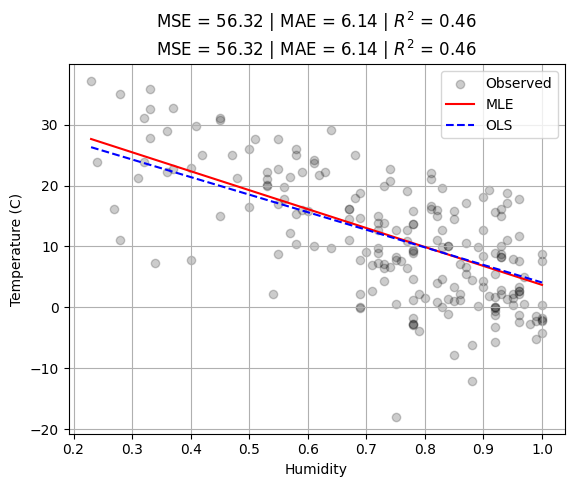

In [315]:
# Graph results
i = 0 ; j = 0
X_ = np.zeros((100, num_features))
X_[:, i] = np.linspace(X_test[:, i].min(), X_test[:, i].max(), 100)
# X__s = scaler.transform(X_)
Y_mle = linear(X_, coef, Y_size)

X_1_df = pd.DataFrame(add_constant(X_), columns = ['const'] + feature_names)
Y_ols = results.predict(X_1_df).values.reshape(-1, Y_size)

plt.scatter(X_test[:, i], Y_test[:, j], c = 'k', alpha = 0.2, label = 'Observed')
plt.plot(X_[:, i], Y_mle[:, j], 'r', label = 'MLE') ; 
plt.plot(X_[:, i], Y_ols[:, j], '--b', label = 'OLS') ; 
plt.xlabel(feature_names[i])
plt.ylabel(target_names[j])
plt.title(f"MSE = {mse_test_mle:.2f} | MAE = {mae_test_mle:.2f} | $R^2$ = {r2_test_mle:.2f}\n"
          f"MSE = {mse_test_ols:.2f} | MAE = {mae_test_ols:.2f} | $R^2$ = {r2_test_ols:.2f}")
plt.grid(True)
plt.legend() ; 

print("MLE Parameters")
for i,term in enumerate(['bias']+feature_names):
    print(f"{term}: {mle_coef[i]:.4f}")
print()
print("OLS Parameters")
for i,term in enumerate(['bias']+feature_names):
    print(f"{term}: {ols_coef[i]:.4f}")